In [2]:
import pandas as pd 
import datetime
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pylab import rcParams
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Я выбрал набор данных о покупках в различных интернет-магазинах сделанных в Olist Store (площадка по типу AliExpress) в Бразилии.

Источник: https://www.kaggle.com/olistbr/brazilian-ecommerce/

In [3]:
commerce_data = pd.read_csv('braziliancommerce.csv', index_col=0)
commerce_data.head()

,customer_id,order_id,product_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
id,,,,,,,,,,,,,,,,,,,,,
1,00012a2ce6f8dcda20d059ce98491703,5f79b5b0931d63f1a42989eb65b9da6e,64315bd8c0c47303179dd2e25b579d00,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04,1,...,65645c124061b43b2edc38b05ee76aab,1,NaN,Tudo dentro do esperado,2017-11-29 00:00:00,2017-12-04 12:00:07,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP
2,000161a058600d5901f007fab4c27140,a44895d095d7e0702b6a162fa2dbeced,84183944dc7cddca87a5d384452c1d3c,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04,1,...,862cae301754fcafa8129022c8eca937,4,NaN,NaN,2017-07-26 00:00:00,2017-07-27 18:17:27,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG
3,0001fd6190edaaf884bcaf3d49edf079,316a104623542e4d75189bb372bc5f8d,9df2b21ec85378d71df4404712e17478,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22,1,...,238e7cc8c4579a3d4db8f2a211db5b06,5,NaN,Muito bom,2017-03-07 00:00:00,2017-03-08 00:23:34,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES
4,0002414f95344307404f0ace7a26f1d5,5825ce2e88d5346438686b0bba99e5ee,af3ec22cce878225aae6d9eb6c7a78eb,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14,1,...,c3a9be1f602ecba1c7bdff5639c975fe,5,NaN,NaN,2017-09-14 00:00:00,2017-09-15 00:26:09,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG
5,000379cdec625522490c315e70c7a9fb,0ab7fb08086d4af9141453c91878ed7a,868b3136c5b206f91b8208fbfdf2cb7c,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18,1,...,fab6aa1b4c382a27ae8625faa342c229,4,NaN,NaN,2018-04-14 00:00:00,2018-04-16 20:17:51,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP


Переменные набора данных:


|  Имя столбца                 |  Описание                                |
|------------------------------|------------------------------------------|
|customer_id	               |Идентификационный номер клиента           |
|order_id	                   |Идентификационный номер заказа            |
|product_id	                   |Идентификационный номер продукта          |
|order_status	               |Состояние заказа (состояние доставки)     |
|order_purchase_timestamp      | 	Время оплаты заказа                   |
|order_approved_at	           |Время прибытия заказа                     |
|order_delivered_carrier_date  |Время доставки заказа курьеру             |
|order_delivered_customer_date |Время доставки заказа клиенту             |
|order_estimated_delivery_date |Ожидаемая дата доставки                   |
|order_item_id	               |Позиция в заказе                          |
|seller_id                     |Идентификационный номер продавца          |
|price                         |Цена заказа                               |
|product_category_name         |Название категории товара                 |
|review_id                     |Идентификационный номер обзора заказа     |
|review_score                  |Оценка обзора                             |
|review_creation_date          |Дата создания обзора                      |
|customer_unique_id            |Уникальный идентификационный номер клиента|
|customer_zip_code_prefix      |Зип-код клиента                           |
|customer_city                 |Город клиента                             |
|customer_state                |Штат клиента                              |



Исследуя данные, попробуем ответить на следующие вопросы:
1. Какие виды товаров пользуются спросом в Бразилии?
2. Влияет ли время года на количество покупок?
3. Присутствует ли сезонность покупок?
4. Влияет ли время года на успешность доставки?

In [4]:
# Для ответа на первый вопрос сгруппируем данные по названию категории товара и отсортуем по убыванию
prod2num = commerce_data[['product_category_name', 'order_id']].groupby('product_category_name').count()
prod2num = prod2num.rename(index=str, columns={'order_id' : 'num'})
prod2num = prod2num.sort_values(by=['num'], ascending=False)
prod2num.head(10)

,num
product_category_name,
cama_mesa_banho,11272
beleza_saude,9728
esporte_lazer,8701
moveis_decoracao,8416
informatica_acessorios,7895
utilidades_domesticas,6989
relogios_presentes,6001
telefonia,4550
ferramentas_jardim,4361


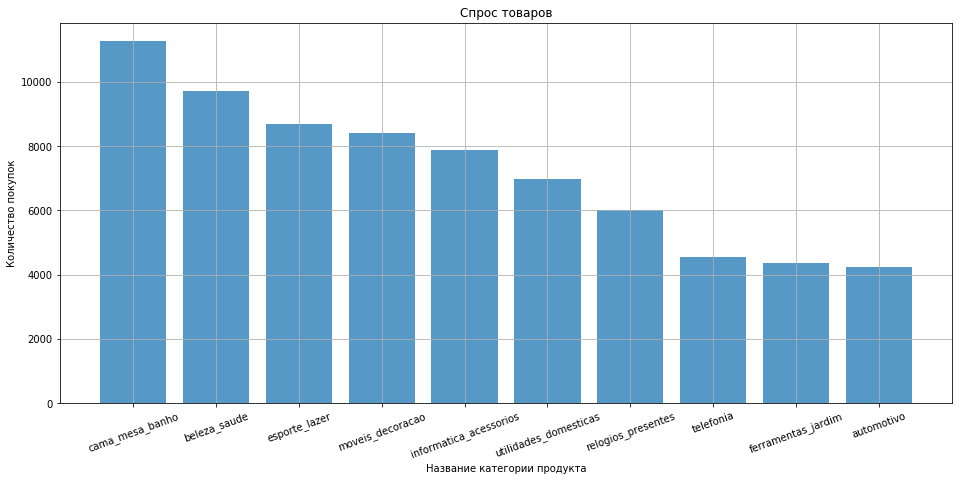

In [5]:
fig = plt.figure(figsize=(16,7))
ax1 = fig.add_subplot(111)
ax1.bar(prod2num.index[:10], prod2num.num[:10], alpha=0.75)
ax1.grid()
ax1.set_title('Спрос товаров')
ax1.set_ylabel('Количество покупок')
ax1.set_xlabel('Название категории продукта')
plt.xticks(rotation=20)
ax1.set_visible(0.5)

Таким образом, можно сказать, что в интернет-магазинах Бразилии наиболее популярны товары:
- cama mesa banho (постельное белье)
- beleza saude	(здоровье красота)
- esporte lazer (активный отдых спорт)
- moveis decoracao (украшение мебели)
- informatica acessorios (компьютерные аксессуары)

Для ответов на следующие вопросы преобразуем исходные данные в временной ряд, а также уберем ненужные столбцы.

In [6]:
ts_data = commerce_data.copy()
# чтобы сгруппировать по дням, уберем чч:мм:сс из order_purchase_timestamp
ts_data['order_purchase_timestamp'] = ts_data['order_purchase_timestamp'].apply(lambda sz: sz.split()[0])
ts_data = ts_data.rename(index=str, columns={'order_purchase_timestamp' : 'date'})
# преобразуем этот столбец в дату
ts_data['date'] = pd.to_datetime(ts_data.date, format='%Y-%m-%d')
# группируем по дате, считаем число заказов и сколько из них было доставленно
ts_data = ts_data.groupby('date').apply(lambda x: pd.Series(dict(
    orders_num = x.shape[0],
    unsuccess_deliveries = (x.order_status != 'delivered').sum()
)))
# установим частоту день для временного ряда, заполняя строки нулями (в эти дни очевидно не было покупок)
ts_data = ts_data.asfreq(freq='D', fill_value=0)

ts_data.head()

,orders_num,unsuccess_deliveries
date,,
2016-09-04,2,2
2016-09-05,1,1
2016-09-06,0,0
2016-09-07,0,0
2016-09-08,0,0


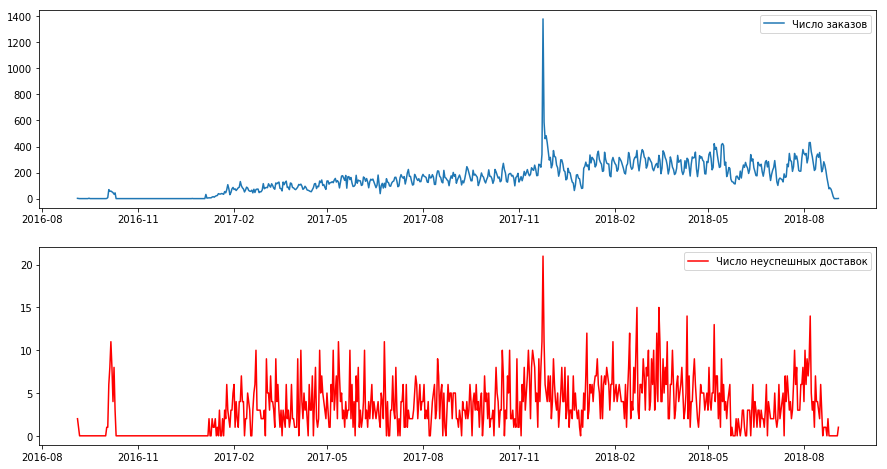

In [7]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
ax1.plot(ts_data.orders_num, label='Число заказов')
ax1.legend(loc='best')
ax2 = fig.add_subplot(212)
ax2.plot(ts_data.unsuccess_deliveries, 'r', label='Число неуспешных доставок')
ax2.legend(loc='best')
plt.show()

DatetimeIndex(['2017-11-24'], dtype='datetime64[ns]', name='date', freq='D')


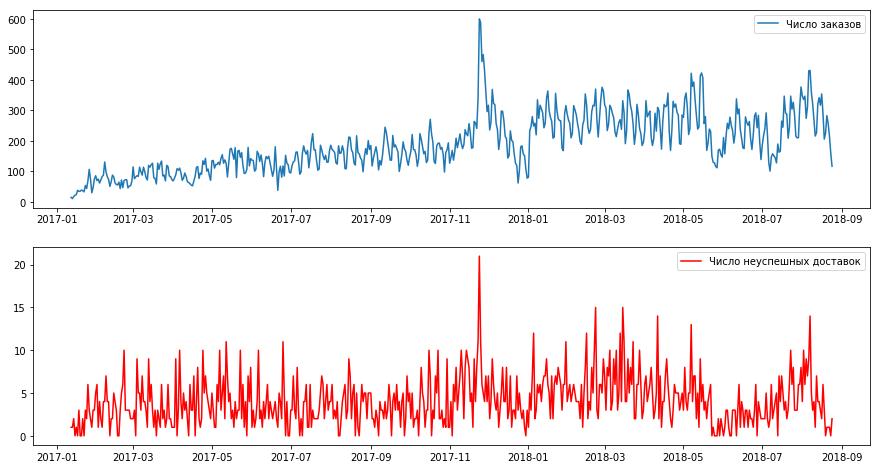

In [8]:
# обрежем неинформативные участки с концов
# а также уменьшим выброс (на самом деле этот "выброс" — день скидок "черная пятница")
ts_data = ts_data.iloc[130:-10]
ind = ts_data.index[ts_data['orders_num'] > 600]
print(ind)
ts_data['orders_num'].loc[ind] = 600

fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
ax1.plot(ts_data.orders_num, label='Число заказов')
ax1.legend(loc='best')
ax2 = fig.add_subplot(212)
ax2.plot(ts_data.unsuccess_deliveries, 'r', label='Число неуспешных доставок')
ax2.legend(loc='best')
plt.show()

Для ответа на второй вопрос (Влияет ли время года на количество покупок?), разобьем график покупок на сезоны и рассмотрим среднее число покупок на этих участках.

Среднее число покупок.
Зимой 1 — 60.6530612244898.
Весной 1 — 107.87096774193549.
Летом 1 — 143.36559139784947.
Осенью 1 — 201.09782608695653.
Зимой 2 — 249.3846153846154.
Весной 2 — 262.3440860215054.
Летом 2 — 248.94117647058823.


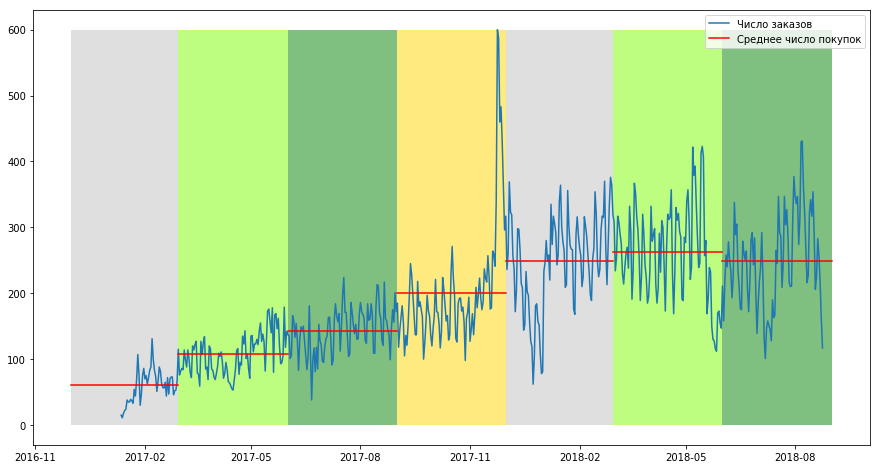

In [9]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(111)
ax1.plot(ts_data.orders_num, label='Число заказов')

print("Среднее число покупок.")

winter1 = pd.date_range(start='12/1/2016', end='3/1/2017', freq='D')
ax1.fill_between(winter1, 600, facecolor='silver', alpha=0.5)
m = ts_data.orders_num.loc[winter1].mean()
ax1.plot(winter1, [m] * winter1.shape[0], 'r', label='Среднее число покупок')
print("Зимой {} — {}.".format(1, m))

spring1 = pd.date_range(start='3/1/2017', end='6/1/2017', freq='D')
ax1.fill_between(spring1, 600, facecolor='lawngreen', alpha=0.5)
m = ts_data.orders_num.loc[spring1].mean()
ax1.plot(spring1, [m] * spring1.shape[0], 'r')
print("Весной {} — {}.".format(1, m))

summer1 = pd.date_range(start='6/1/2017', end='9/1/2017', freq='D')
ax1.fill_between(summer1, 600, facecolor='green', alpha=0.5)
m = ts_data.orders_num.loc[summer1].mean()
ax1.plot(summer1, [m] * summer1.shape[0], 'r')
print("Летом {} — {}.".format(1, m))

autumn1 = pd.date_range(start='9/1/2017', end='12/1/2017', freq='D')
ax1.fill_between(autumn1, 600, facecolor='gold', alpha=0.5)
m = ts_data.orders_num.loc[autumn1].mean()
ax1.plot(autumn1, [m] * autumn1.shape[0], 'r')
print("Осенью {} — {}.".format(1, m))

winter2 = pd.date_range(start='12/1/2017', end='3/1/2018', freq='D')
ax1.fill_between(winter2, 600, facecolor='silver', alpha=0.5)
m = ts_data.orders_num.loc[winter2].mean()
ax1.plot(winter2, [m] * winter2.shape[0], 'r')
print("Зимой {} — {}.".format(2, m))

spring2 = pd.date_range(start='3/1/2018', end='6/1/2018', freq='D')
ax1.fill_between(spring2, 600, facecolor='lawngreen', alpha=0.5)
m = ts_data.orders_num.loc[spring2].mean()
ax1.plot(spring2, [m] * spring2.shape[0], 'r')
print("Весной {} — {}.".format(2, m))

summer2 = pd.date_range(start='6/1/2018', end='9/1/2018', freq='D')
ax1.fill_between(summer2, 600, facecolor='green', alpha=0.5)
m = ts_data.orders_num.loc[summer2].mean()
ax1.plot(summer2, [m] * summer2.shape[0], 'r')
print("Летом {} — {}.".format(2, m))

ax1.legend(loc='best')
plt.show()

Первые четыре сезона можно не рассматривать, так как на них очевиден тренд. Площадка только начала набирать популярность и общее количество покупок независимо от сезона растет.
'2017-11-24' была "черная пятница" и количество клиентво выросло и "раскрутка" площадки закончилась.
По последним трем сезонам можно сказать в целом время года на количество покупок никак не влияет.

Выясним присутствует ли сезонность покупок.

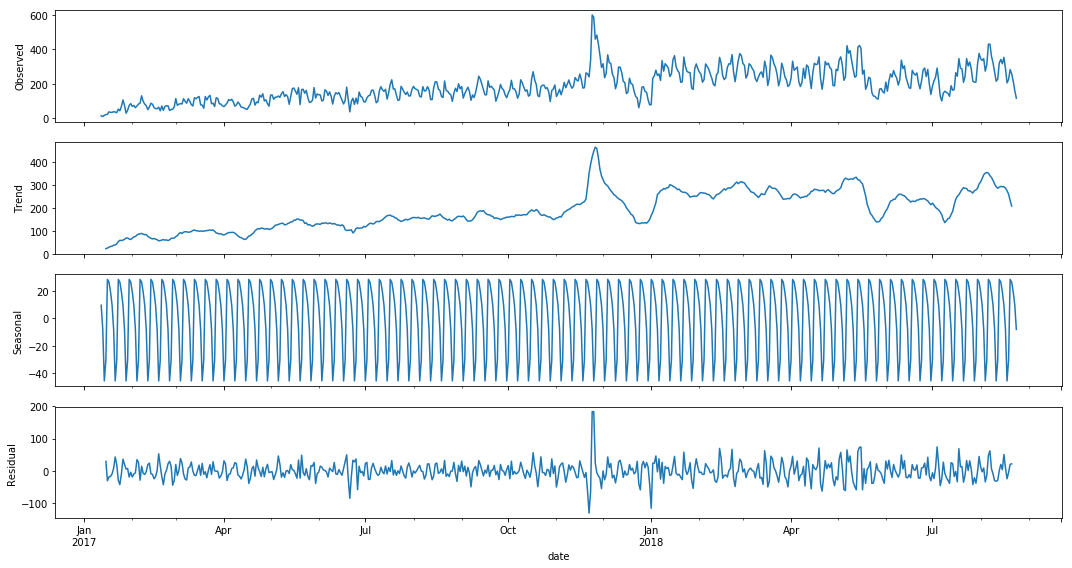

In [10]:
rcParams['figure.figsize'] = 15, 8
sm.tsa.seasonal_decompose(ts_data.orders_num).plot()
plt.show()

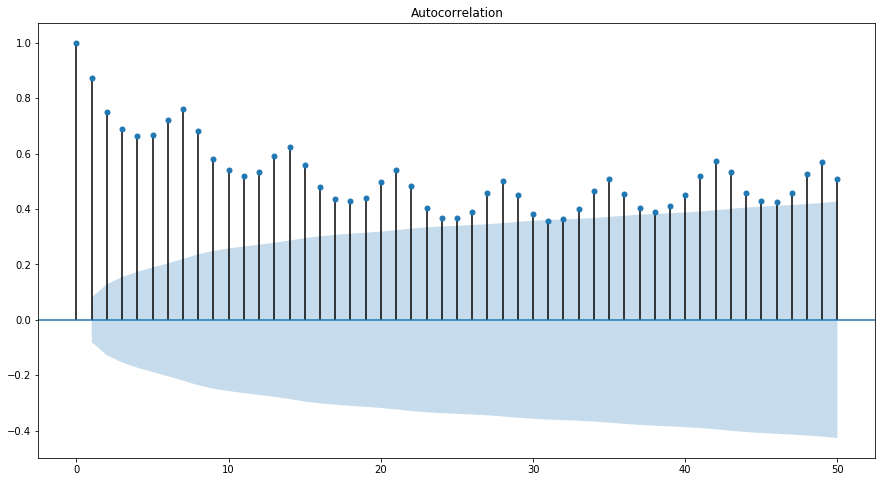

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
sm.graphics.tsa.plot_acf(ts_data.orders_num.values, lags=50, ax = ax)
plt.show()

Как видим у ряда выражена сезонность и тренд (по началу достаточно линейно растущий). По автокорреляции можно сказать, что сезонность составляет 7 дней.

Попробуем предсказать наш ряд. Вначале используем метод Хольта-Уинтерса.

In [12]:
# разобьем наш временной ряд на участок, по которому мы будем обучать модели
# тест участок, по которому мы будем смотреть ошибку
# и создадим участок, который будем предсказывать.

train = ts_data.drop(columns=['unsuccess_deliveries']).sort_values(
    'date', ascending = True).iloc[:-50 + 1]

test = ts_data.drop(columns=['unsuccess_deliveries']).sort_values(
    'date', ascending = True).iloc[-50:]

for_predict_section = pd.date_range(start=train.index[-1], periods=60, freq='D')

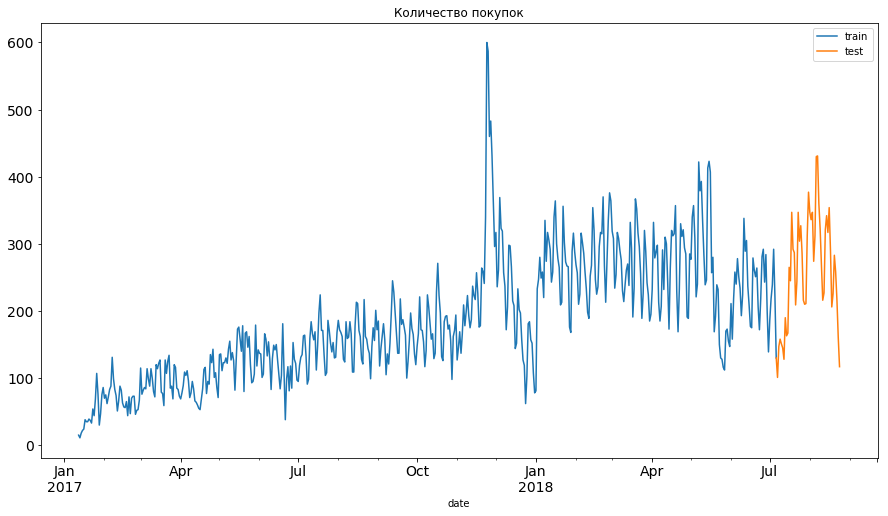

In [13]:
train.orders_num.plot(figsize=(15,8), title='Количество покупок', fontsize=14, label='train')
test.orders_num.plot(figsize=(15,8), title='Количество покупок', fontsize=14, label='test')
plt.legend(loc='best')
plt.show()

In [14]:
holt_fit = ExponentialSmoothing(np.asarray(train.orders_num),
                                seasonal_periods=7,
                                trend='add', seasonal='add').fit()

holt_winter_predict = pd.Series(data=holt_fit.forecast(len(for_predict_section)),
                                index=for_predict_section)

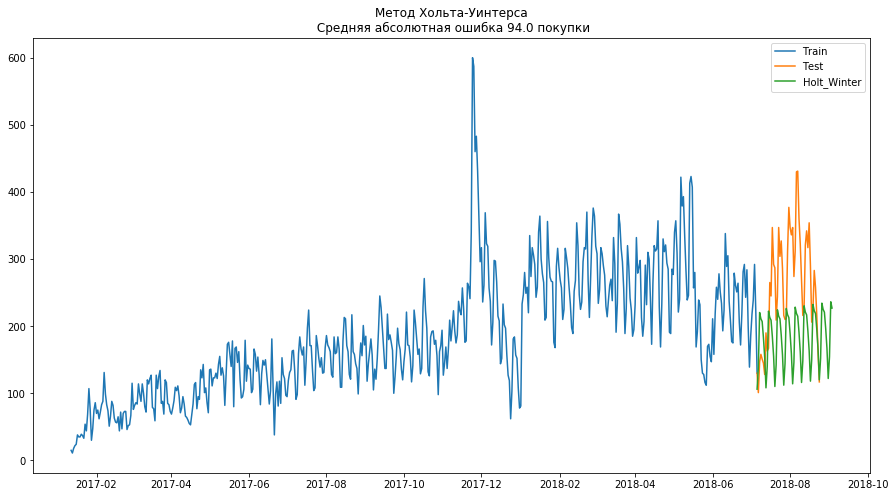

In [15]:
plt.figure(figsize=(15,8))
plt.plot(train.orders_num, label='Train')
plt.plot(test.orders_num, label='Test')
plt.plot(holt_winter_predict, label='Holt_Winter')
plt.title("Метод Хольта-Уинтерса\n Средняя абсолютная ошибка {} покупки".format(
    round(mean_absolute_error(holt_winter_predict.values[:len(test.orders_num)], test.orders_num.values))))
plt.legend(loc='best')
plt.show()

Ошибка достаточно большая. Попробуем построить SARIMA.
Для этого вначале сделаем временной ряд стационарным.

In [16]:
train_diff = train.orders_num.diff(periods=7).dropna()

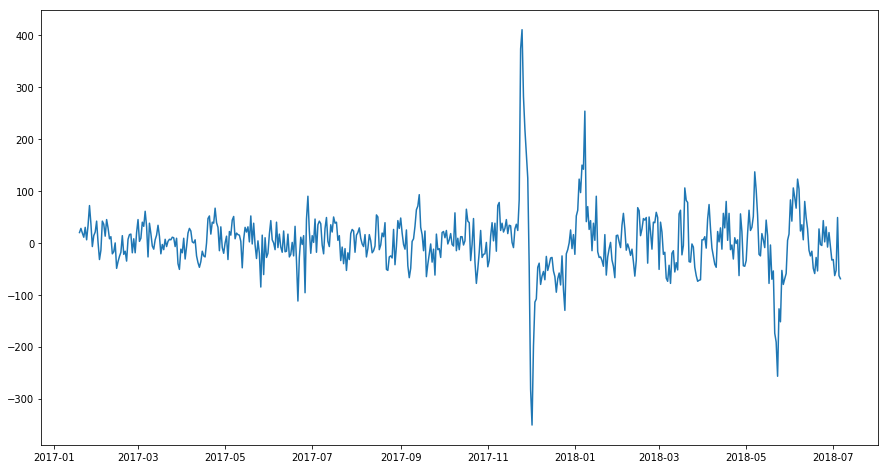

In [17]:
plt.figure(figsize=(15,8))
plt.plot(train_diff, label='Train')
plt.show()

In [18]:
stat_test = sm.tsa.adfuller(train_diff)
print ('adf: ', stat_test[0] )
print ('p-value: ', stat_test[1])
print('Critical values: ', stat_test[4])
if stat_test[0]> stat_test[4]['5%']: 
    print ('есть единичные корни, ряд не стационарен')
else:
    print ('единичных корней нет, ряд стационарен')

adf:  -6.765106207448171
p-value:  2.7297136244509845e-09
Critical values:  {'1%': -3.443136494643789, '5%': -2.8671794725841147, '10%': -2.5697736283668187}
единичных корней нет, ряд стационарен


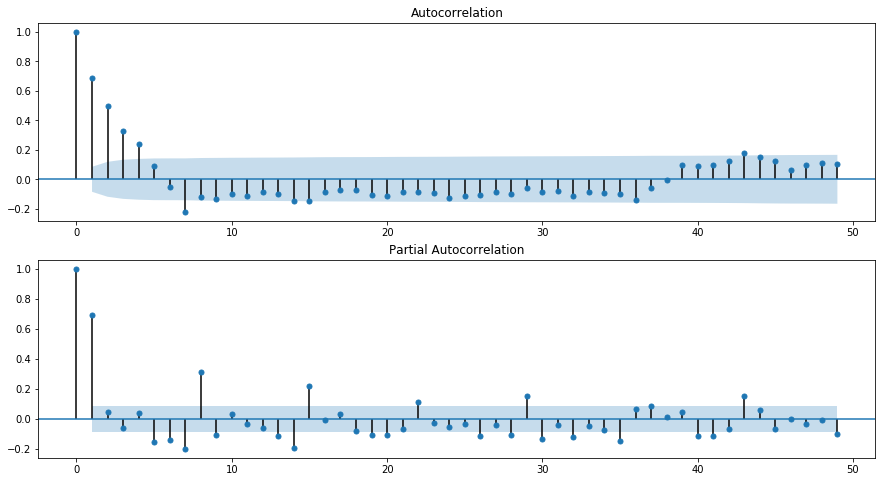

In [19]:
fig = plt.figure(figsize=(15,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train_diff.values.squeeze(), lags=49, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train_diff, lags=49, ax=ax2)

Критерий Дики-Фуллера отвергает нулевую гипотезу о нестационарности, а так же на графиках не так много значимых лагов. Значит можно сказать, что ряд стационарен. Подберем коэффиценты для SARIMA.

In [20]:
#ACF
q = 4 # номер последнего несезонного лага при котором автокорреляция значима
Q = 1 # номер последнего сезонного значимого лага на графике функции автокорреляции

#PACF
p = 15 # номер последнего несезонного лага при котором частичная автокорреляция значима
P = 6 # номер последнего сезонного значимого лага на графике функции частичной автокорреляции

d = 0
D = 1 # так как потребовалось делать сезонное дифференцирование

s = 7 # сезонность

In [21]:
%%time
best_model=sm.tsa.statespace.SARIMAX(train.orders_num.squeeze(), order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit()

CPU times: user 25min 36s, sys: 42.1 s, total: 26min 18s
Wall time: 7min 9s


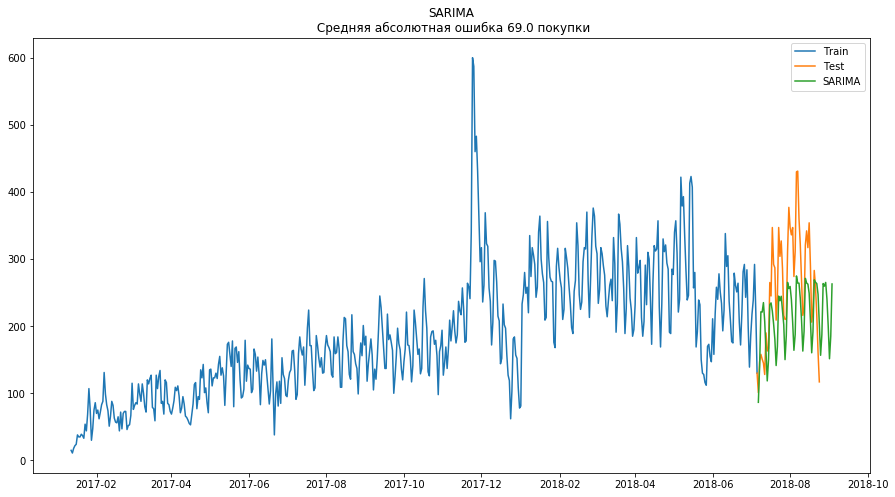

In [22]:
forecast = best_model.predict(start = train.shape[0], end = train.shape[0] + len(for_predict_section))

sarima_predict = pd.Series(data=forecast, index=for_predict_section)
plt.figure(figsize=(15,8))
plt.plot(train.orders_num, label='Train')
plt.plot(test.orders_num, label='Test')
plt.plot(sarima_predict, label='SARIMA')
plt.title("SARIMA\n Средняя абсолютная ошибка {} покупки".format(
    round(mean_absolute_error(sarima_predict.values[1:len(test.orders_num)], test.orders_num.values[1:]))))
plt.legend(loc='best')
plt.show()

Результат лучше, но, видимо, не совсем верно подобраны коэффициенты.

Напоследок предсказаний попробуем использовать линейную регрессию (код и идея взяты с https://habr.com/company/ods/blog/327242/)

In [23]:
def code_mean(data, cat_feature, real_feature):
    """
    Возвращает словарь, где ключами являются уникальные категории признака cat_feature, 
    а значениями - средние по real_feature
    """
    return dict(data.groupby(cat_feature)[real_feature].mean())

In [24]:
def prepareData(data, lag_start, lag_end, test_index):

    data = pd.DataFrame(data.copy())
    data.columns = ["y"]

    # добавляем лаги исходного ряда в качестве признаков
    for i in range(lag_start, lag_end):
        data["lag_{}".format(i)] = data.y.shift(i)

    data["weekday"] = data.index.weekday
    data['is_weekend'] = data.weekday.isin([5,6])*1

    # считаем средние только по тренировочной части, чтобы избежать лика
    data['weekday_average'] = list(map(code_mean(data[:test_index], 'weekday', "y").get, data.weekday))

    # выкидываем закодированные средними признаки 
    data.drop(["weekday"], axis=1, inplace=True)

    data = data.dropna()
    data = data.reset_index(drop=True)
    
    # разбиваем весь датасет на тренировочную и тестовую выборку
    X_train = data.loc[:test_index].drop(["y"], axis=1)
    y_train = data.loc[:test_index]["y"]
    X_test = data.loc[test_index:].drop(["y"], axis=1)
    y_test = data.loc[test_index:]["y"]

    return X_train, X_test, y_train, y_test

In [25]:
# преобразуем к нужному виду
to_lr_data = train.reindex(
    pd.date_range(start=ts_data.index[0], end=for_predict_section[-1], freq='D'),
    fill_value=0)

In [26]:
# будем предсказывать следующие после train  60 дней (for_predict_section) по предыдущим 100
X_train, X_test, y_train, y_test = prepareData(to_lr_data.orders_num,
                                               test_index=len(train.orders_num) - 160,
                                               lag_start=60,
                                               lag_end=160)

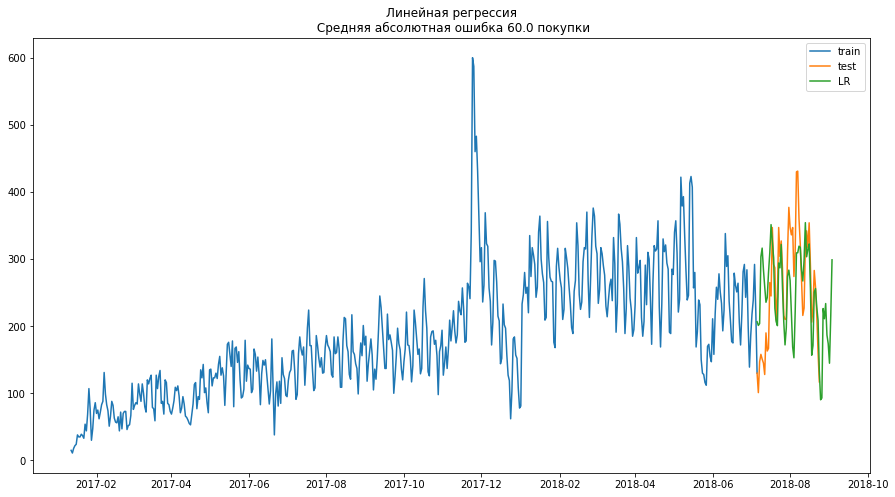

In [27]:
lr = LinearRegression()
lr.fit(X_train, y_train)
prediction = lr.predict(X_test)
lr_pred = pd.Series(index=for_predict_section, data=prediction)

plt.figure(figsize=(15, 8))
plt.plot(train.orders_num, label='train')
plt.plot(test.orders_num, label='test')
plt.plot(lr_pred, label='LR')
plt.title("Линейная регрессия\n Средняя абсолютная ошибка {} покупки".format(round(mean_absolute_error(prediction[:len(test.orders_num)], test.orders_num.values))))
plt.legend(loc="best")
plt.show()

Результат лучше, но опять же можно пробовать ещё улучшить, меняя lag_start и lag_end.

Для ответа на четвертый вопрос (влияет ли время года на успешность доставки) посчитаем долю неуспешных доставок относительно всех доставок в день.

Разобьем датасет на сезоны, убедимся, что распределения у них нормальные. Сформулируем гипотезу, что время года не влияет на успешность доставки, и воспользуемся дисперсионным анализом.

In [28]:
ts_data['percent_unsucc_deliveries'] = ts_data['unsuccess_deliveries'] / ts_data['orders_num'] * 100
ts_data.head()

,orders_num,unsuccess_deliveries,percent_unsucc_deliveries
date,,,
2017-01-12,15,1,6.666667
2017-01-13,11,1,9.090909
2017-01-14,18,2,11.111111
2017-01-15,22,0,0.000000
2017-01-16,24,1,4.166667


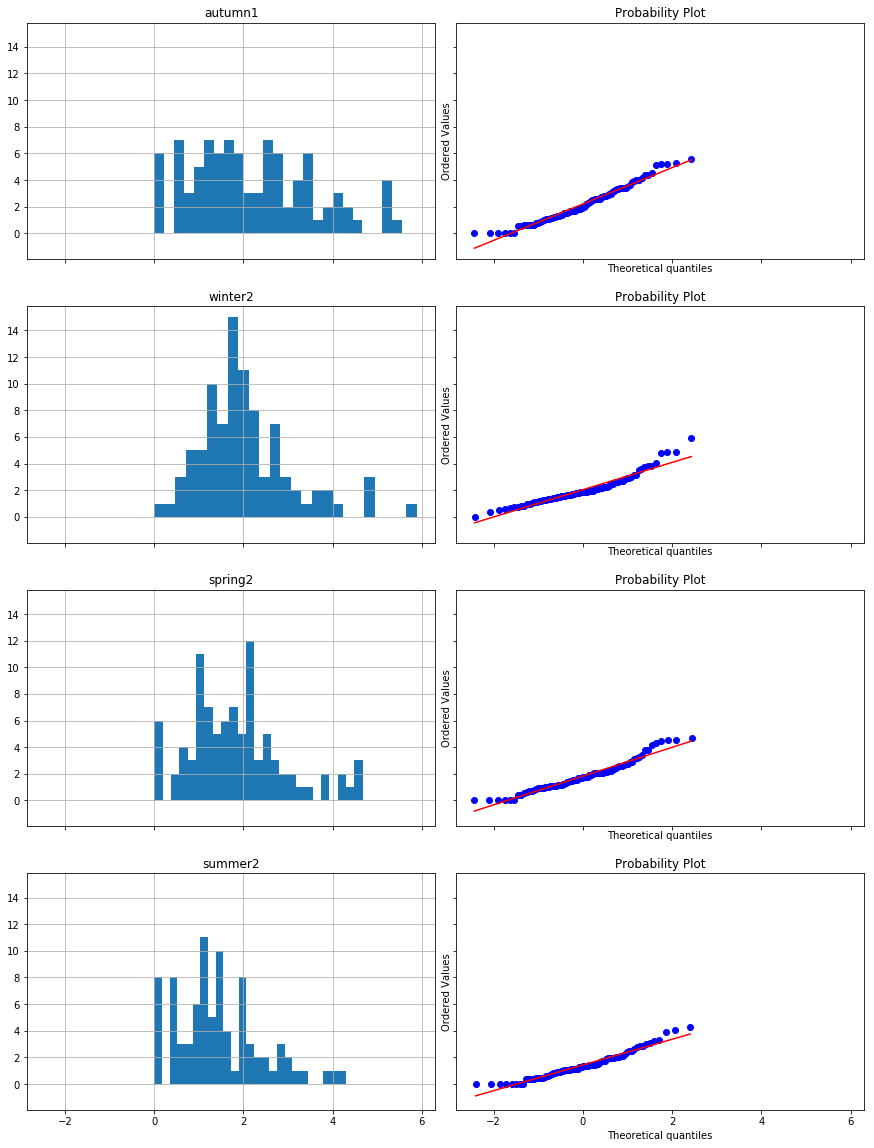

In [29]:
# проверяем, что распределение процента неудачных доставок нормально
sample_groups = [ts_data.loc[autumn1],
                ts_data.loc[winter2],
                ts_data.loc[spring2],
                ts_data.loc[summer2].dropna()]

seasons = ['autumn1', 'winter2', 'spring2', 'summer2']

fig, axes = plt.subplots(4, 2, sharex=True, sharey=True)
fig.set_figheight(20)
fig.set_figwidth(15)

for i in range(4):
    axes[i, 0].hist(sample_groups[i].percent_unsucc_deliveries, 25)
    axes[i, 0].set_title(seasons[i])
    axes[i, 0].grid()
    stats.probplot(sample_groups[i].percent_unsucc_deliveries, dist = "norm", plot = axes[i, 1])
    
plt.subplots_adjust(wspace=0.05, hspace=0.2)

In [30]:
F, p = stats.f_oneway(sample_groups[0].percent_unsucc_deliveries,
                      sample_groups[1].percent_unsucc_deliveries,
                      sample_groups[2].percent_unsucc_deliveries,
                      sample_groups[3].percent_unsucc_deliveries)

In [31]:
print(F, p)

7.432061036285858 7.685068395500037e-05


Вспомним, что при множественном сравнении вероятность ошибочно найти различия там, где их нет, возрастает и составляет P = $ 1 - (1 - \alpha) ^ k $, k — число сравнений, $ \alpha $ — установленный уровень значимости.

Воспользуемся поправкой Бонферонни, которая заключается в том, что достигаемые уровни значимости гипотез сравниваются с уровнем значимости $ \frac{\alpha} {k}$.

В нашем случае $\alpha = 0.05$, а $k = 12$.

$p = 0.00007685$  это меньше, чем $\frac{0.05} {12} = 0.00417$ следовательно наша гипотеза неверна и время года влияет на успешность доставки

Если внимательно посмотреть на гистограммы выше, то можно понять, что зимой доля неуспешных доставок выше. Это выглядит разумным.

# Вывод

Мы провели анализ данных о покупках в различных интернет-магазинах сделанных в Бразилии.
Ответили на поставленные вопросы:
1. Какие виды товаров пользуются спросом в Бразилии?
    - постельное белье
    - здоровье красота
    - активный отдых спорт
    - украшение мебели
    - компьютерные аксессуары
2. Влияет ли время года на количество покупок?
    - не влияет
3. Присутствует ли сезонность покупок?
    - присутствует (недельная)
4. Влияет ли время года на успешность доставки?
    - влияет (зимой доля успешных доставок меньше)
    
Так же мы заметили тенденцию развития площадки интернет-магазинов и насколько хорошо повлияла на развитие "черная пятница". В конце мы попробовали предсказать количество покупок с помощью различных методов. Наилучший результат показала линейная регрессия.